The objective is to analyze the flight
booking dataset obtained from a
platform which is used to book flight
tickets. 
A thorough study of the data
will aid in the discovery of valuable
insights that will be of enormous
value to passengers. Apply EDA,
statistical methods and Machine
learning algorithms in order to get
meaningful information from it

Flight booking price prediction dataset contains around 3 lacs records
with 11 attributes .

### Attributes - Description <br>
Airline - Name of the airline company<br>
Flight -  Plane's flight code<br>
Source City - City from which the flight takes off<br>
Departure -  Time Time of Departure<br>
Stops -  Number of stops between the source and destination cities<br>
Arrival Time -  Time of Arrival<br>
Destination City - City where the flight will land<br>
Class -  Contains information on seat class<br>
Duration -  Overall amount of time taken to travel between cities in hours.<br>
Days left -  Subtracting the trip date by the booking date.<br>
Price -  Ticket price<br>

# Importing the Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [156]:
df =  pd.read_csv("Flight_Booking.csv")
df = df.drop(columns = ["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [22]:
df.shape

(300153, 11)

In [24]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# Data Cleaning

In [27]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [29]:
df.duplicated().sum()

0

### As there are no null values and duplicates we can proceed with the data 

# Data Visualization

## Plot between Airline and Price

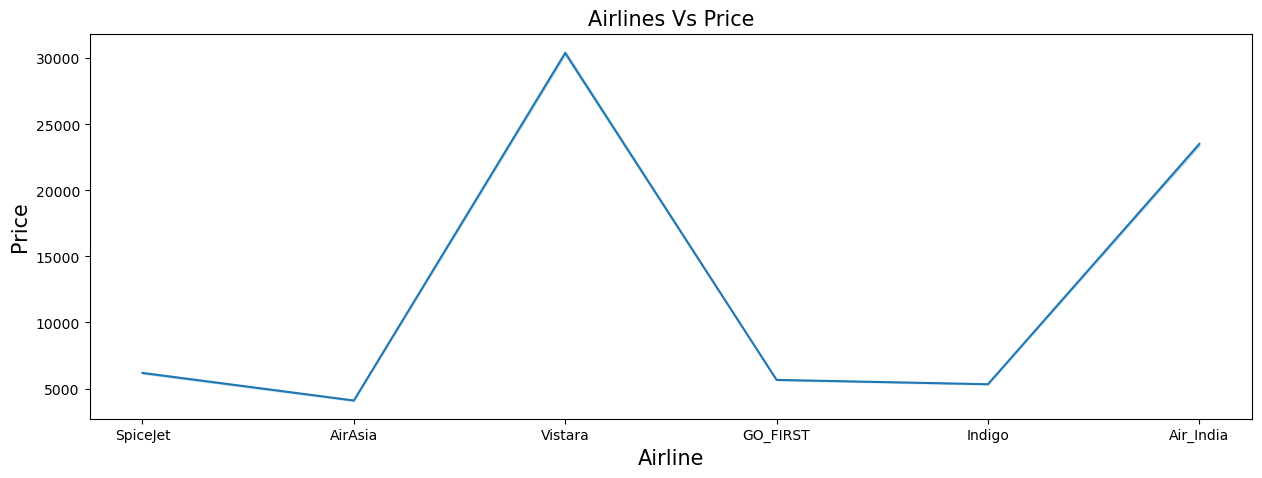

In [35]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

### There is a variation in price with different airlines

## Plot between days_left and Price

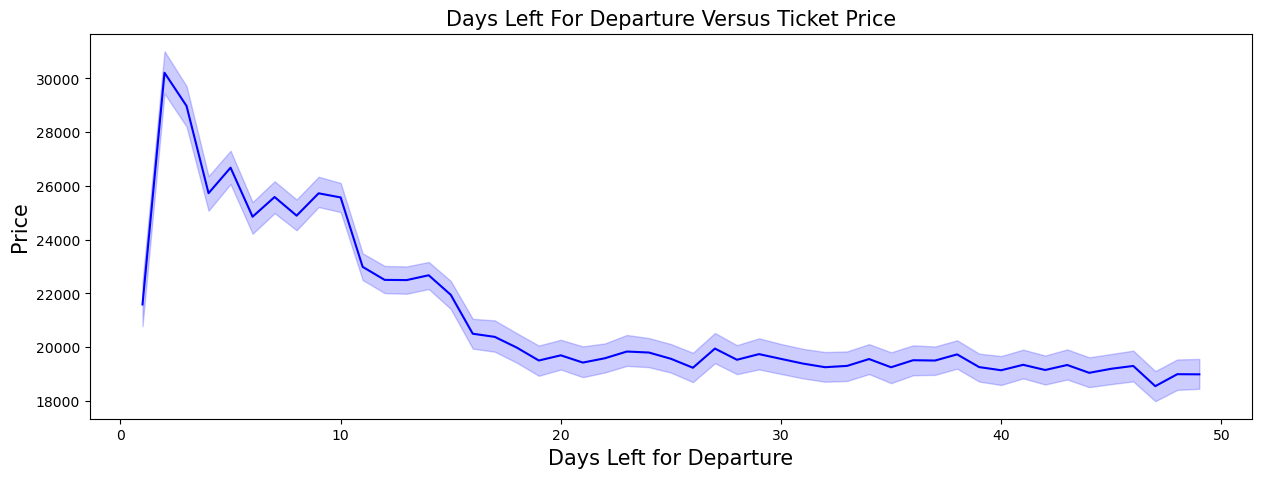

In [43]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price', color='blue')
plt.title('Days Left For Departure Versus Ticket Price', fontsize=15)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

### The price of the ticket increases as the days left for departure decreases

## Bar plot between Airline and Price  to check the price range of all the flights

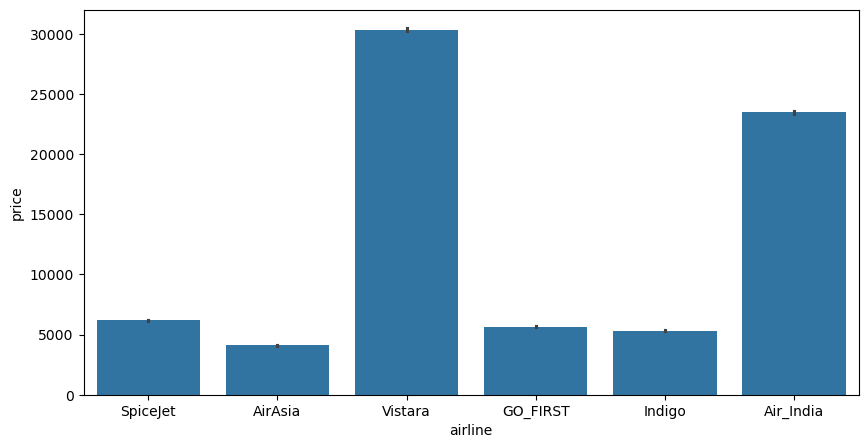

In [54]:
plt.figure(figsize=(10,5));
sns.barplot(x='airline',y='price', data=df)
plt.show()

 ## Plot between Class and Price to check range of price of all the flights of Economy and Business class

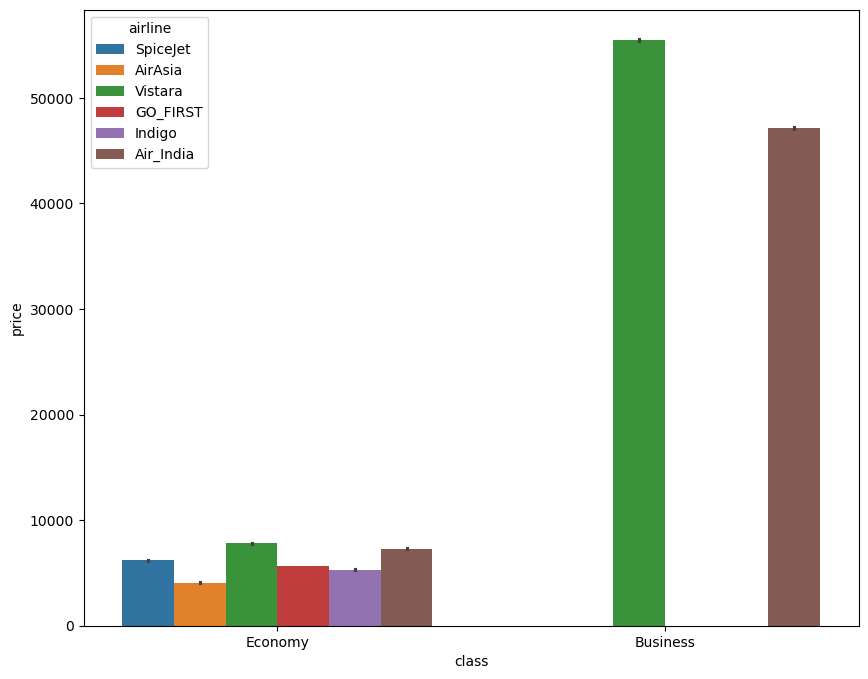

In [66]:
plt.figure(figsize=(10,8));
sns.barplot(x='class',y='price', data=df,hue='airline')
plt.show()

## Range of price of flights with source and destination city according to the days left

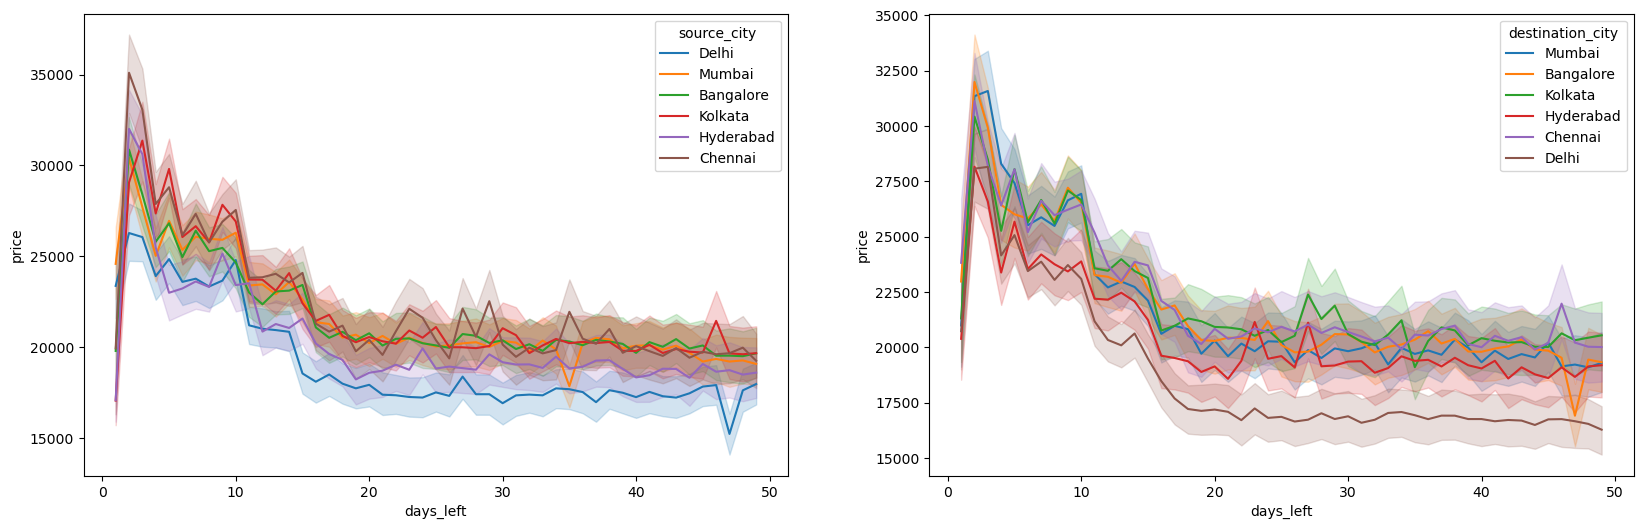

In [71]:
fig, ax = plt.subplots (1,2, figsize=(20,6))
sns.lineplot(x='days_left',y='price', data=df,hue='source_city', ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city', ax=ax[1])
plt.show()

## Visualization of categorical features with countplot

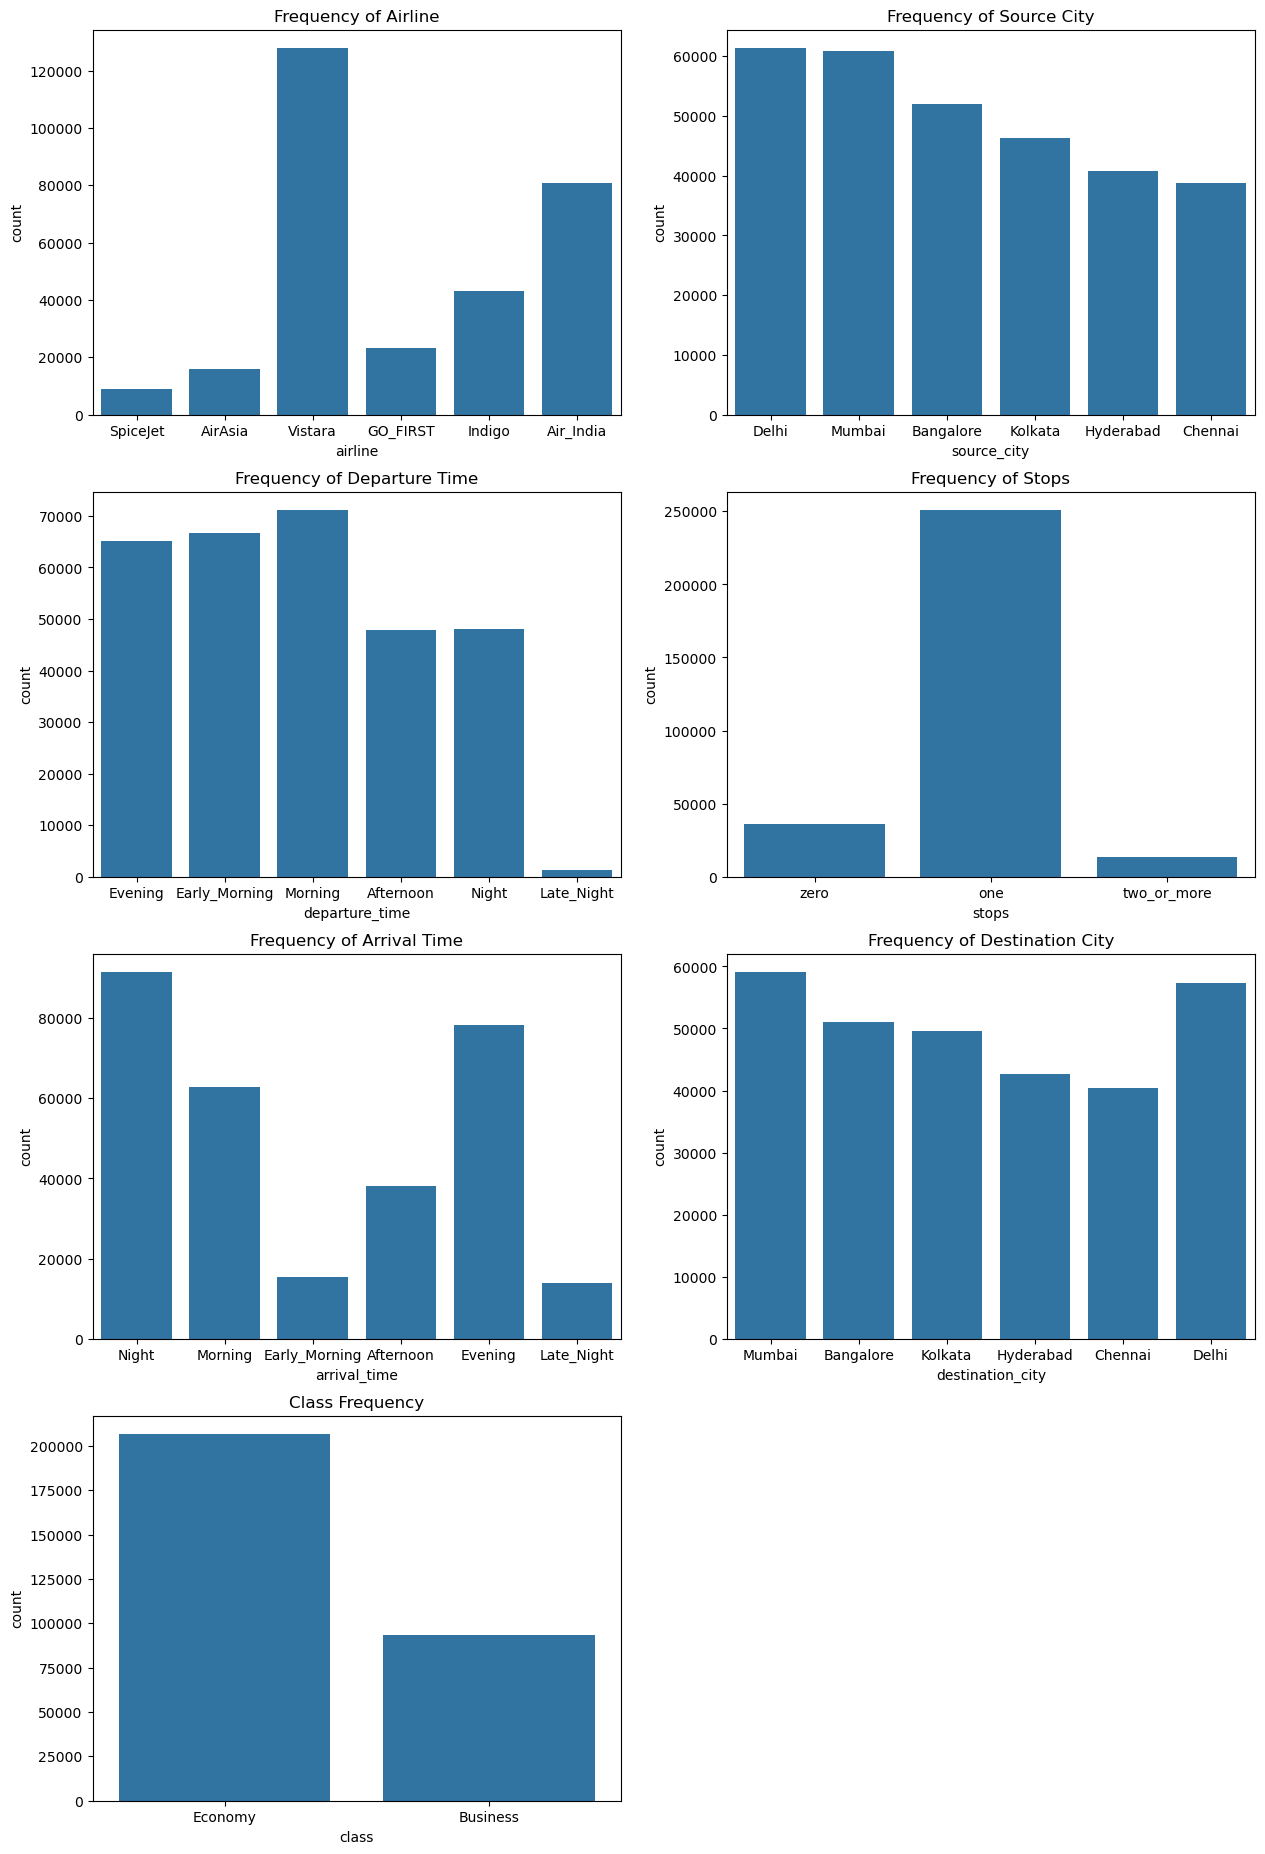

In [79]:
plt.figure(figsize=(15,23))
plt.subplot(4, 2, 1) 
sns.countplot(x=df["airline"], data=df) 
plt.title("Frequency of Airline")
plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df) 
plt.title("Frequency of Source City")
plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df) 
plt.title("Frequency of Departure Time")
plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df) 
plt.title("Frequency of Stops")
plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df) 
plt.title("Frequency of Arrival Time")
plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df) 
plt.title("Frequency of Destination City")
plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")
plt.show()

# Label Encoding

## Performing One Hot Encoding for categorical features of a dataframe

In [158]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline"]=le.fit_transform(df["airline"])
df["flight"]=le.fit_transform(df["flight"])
df["source_city"]=le.fit_transform(df ["source_city"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["stops"]=le.fit_transform(df["stops"])
df["arrival_time"]=le.fit_transform(df["arrival_time"]) 
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


# Feature Selection

### Plotting the correlation graph to see the correlation between features and dependent variable.

In [166]:
df = df.drop(columns= ["flight"])

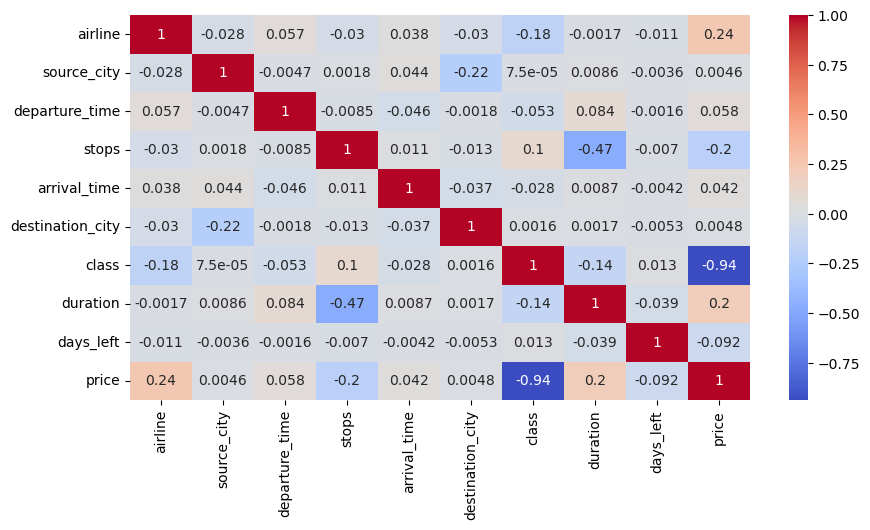

In [168]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [170]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


## Selecting the features using VIF. 
## VIF should be less than 5. So drop the stops feature.

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
 if ((df[col].dtype != 'object') & (col != 'price') ):
     col_list.append(col)
     
X = df [col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [174]:
df = df.drop(columns= ["stops"])

In [176]:
df.head()

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,5,5,1,2.17,1,5953
1,4,2,1,4,5,1,2.33,1,5953
2,0,2,1,1,5,1,2.17,1,5956
3,5,2,4,0,5,1,2.25,1,5955
4,5,2,4,4,5,1,2.33,1,5955


In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
 if ((df[col].dtype != 'object') & (col != 'price') ):
     col_list.append(col)
     
X = df [col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


# Linear Regression

## Applying standardization and implementing Linear Regression Model to predict the price of a flight.

In [235]:
x = df.drop(columns=["price"])
y = df['price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

difference_LR=pd.DataFrame(np.c_[y_test,y_pred], columns=["Actual_Value", "Predicted_Value"])
difference_LR

,Actual_Value,Predicted_Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596
...,...,...
60026,5026.0,4960.777767
60027,3001.0,4693.865426
60028,6734.0,4974.962678
60029,5082.0,2729.650066


In [207]:
from sklearn.metrics import r2_score
r2_score_LR =  r2_score(y_test,y_pred)
print(f'r2 score:{r2_score_LR}')

from sklearn import metrics
MAE = mean_abs_error_LR = metrics.mean_absolute_error(y_test,y_pred)
print(f'MAE:{MAE}')

from sklearn.metrics import mean_absolute_percentage_error 
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE:{MAPE}')

mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f'RMSE:{root_mean_sq_error}')

r2 score:0.897752737512321
MAE:4468.426673542111
MAPE:0.34765804610681783
RMSE:7259.934664536733


## Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) of the Linear regression model is 7259.93 and Mean absolute percentage error(MAPE) is 34 percent. Lower the RMSE and MAPE better the model.

## Plotting the graph of actual and predicted price of flight

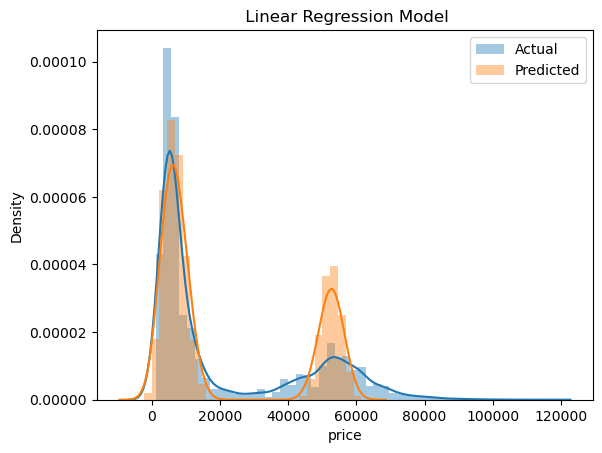

In [241]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred, label="Predicted")
plt.legend()
plt.title(" Linear Regression Model")
plt.show()

# Decision Tree Regressor

In [230]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train) 
y_pred_DT = dt.predict(x_test)
print(f'y_pred of decision tree:{y_pred_DT}')

r2_score_DT = r2_score (y_test,y_pred_DT)
print(f'r2 score of Decision Tree:{r2_score_DT}')

mean_abs_error= metrics.mean_absolute_error(y_test,y_pred_DT) 
print(f'mean_abs_error:{mean_abs_error}')

from sklearn.metrics import mean_absolute_percentage_error 
mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred_DT)
print(f'mean_absolute_percentage_error:{mean_absolute_percentage_error}')

mean_sq_error=metrics.mean_squared_error(y_test,y_pred_DT)
print(f'mean_sq_error:{mean_sq_error}')

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
print(f'root_mean_sq_error:{root_mean_sq_error}')

y_pred of decision tree:[ 7366. 72783.  6195. ...  6314.  5082. 50449.]
r2 score of Decision Tree:0.974773676139205
mean_abs_error:1214.4925677288954
mean_absolute_percentage_error:0.07733733474163437
mean_sq_error:13003722.77754734
root_mean_sq_error:3606.0674948685223


## Mean absolute percentage error is 7.7 percent and RMSE is 3606 which is less than the linear regression model

In [233]:
difference_DT=pd.DataFrame(np.c_[y_test,y_pred_DT], columns=["Actual_Value", "Predicted_Value"])
difference_DT

,Actual_Value,Predicted_Value
0,7366.0,7366.0
1,64831.0,72783.0
2,6195.0,6195.0
3,60160.0,60160.0
4,6578.0,6578.0
...,...,...
60026,5026.0,5301.0
60027,3001.0,3001.0
60028,6734.0,6314.0
60029,5082.0,5082.0


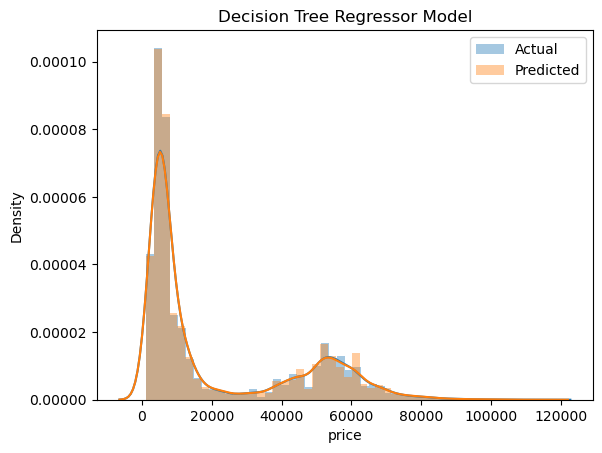

In [253]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred_DT, label="Predicted")
plt.legend()
plt.title("Decision Tree Regressor Model")
plt.show()

In [243]:

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

y_pred_RF = rfr.predict(x_test) 

print(f'y_pred of  Random Forest:{y_pred_RF}')

r2_score_RF = r2_score (y_test,y_pred_DT)
print(f'r2 score of Random Forest:{r2_score_RF}')

mean_abs_error= metrics.mean_absolute_error(y_test,y_pred_RF) 
print(f'mean_abs_error:{mean_abs_error}')

from sklearn.metrics import mean_absolute_percentage_error 

mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred_RF)
print(f'mean_absolute_percentage_error:{mean_absolute_percentage_error}')

mean_sq_error=metrics.mean_squared_error(y_test,y_pred_RF)
print(f'mean_sq_error:{mean_sq_error}')

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(f'root_mean_sq_error:{root_mean_sq_error}')

y_pred of  Random Forest:[ 6248.58 69527.16  6214.16 ...  6527.53  4379.82 67729.84]
r2 score of Random Forest:0.974773676139205
mean_abs_error:1123.412776454784
mean_absolute_percentage_error:0.073528114256233
mean_sq_error:7967738.475175753
root_mean_sq_error:2822.718277684784


In [244]:
difference_DT=pd.DataFrame(np.c_[y_test,y_pred_RF], columns=["Actual_Value", "Predicted_Value"])
difference_DT

,Actual_Value,Predicted_Value
0,7366.0,6248.58
1,64831.0,69527.16
2,6195.0,6214.16
3,60160.0,60274.24
4,6578.0,6572.81
...,...,...
60026,5026.0,5093.55
60027,3001.0,2996.32
60028,6734.0,6527.53
60029,5082.0,4379.82


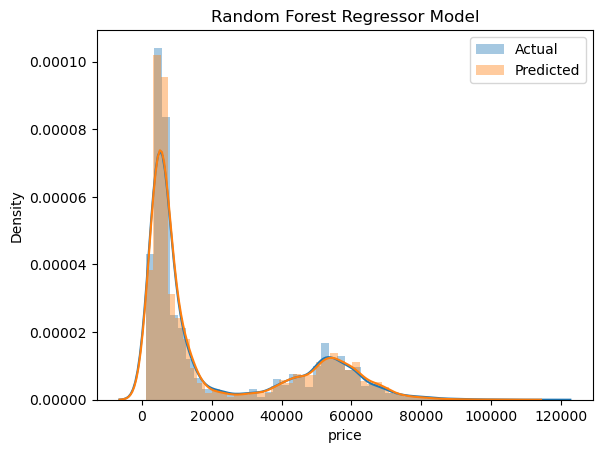

In [251]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred_RF, label="Predicted")
plt.legend()
plt.title("Random Forest Regressor Model")
plt.show()

## Mean absolute percentage error is 7.3 percent and RMSE is 2822 which is less than the linear regression and decision tree model